In [89]:
import pandas as pd
import numpy as np

import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Set the random seed for reproducibility
np.random.seed(42)

# Generate data for 1000 people
n_samples = 1000

# Age: Random ages between 18 and 65
age = np.random.randint(18, 66, size=n_samples)

# Sex: Randomly assigning 'male' or 'female' with equal probability
sex = np.random.choice(['male', 'female'], size=n_samples)

# BMI: Random BMI values between 18.5 (healthy) and 40 (overweight)
bmi = np.random.uniform(18.5, 40, size=n_samples)

# Children: Random number of children between 0 and 5
children = np.random.randint(0, 6, size=n_samples)

# Smoker: Randomly assigning 'yes' or 'no' with probability of 0.2 for 'yes'
smoker = np.random.choice(['yes', 'no'], size=n_samples, p=[0.2, 0.8])

# Region: Randomly assign one of four regions
region = np.random.choice(['northeast', 'northwest', 'southeast', 'southwest'], size=n_samples)

# Charges: Generate a base charge influenced by several factors
charges_base = 10000  # Base charge
charges = charges_base + 100 * age + 200 * bmi + 500 * children + 3000 * (smoker == 'yes') + \
         np.random.normal(0, 1000, n_samples)  # Adding noise

# Create the DataFrame
insurance_data = pd.DataFrame({
    'age': age,
    'sex': sex,
    'bmi': bmi,
    'children': children,
    'smoker': smoker,
    'region': region,
    'charges': charges
})

# Show a preview of the generated data
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,56,male,25.936486,2,no,northwest,21146.899466
1,46,female,31.849684,2,no,northwest,21152.641266
2,32,male,19.483454,2,no,southeast,17331.468379
3,60,female,37.238041,2,no,southwest,24453.892791
4,25,male,39.430013,1,no,northwest,18451.826182


# Dataset Exploration:

In [90]:
insurance_data.info()
# Explorinbg the data information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


* The code above list  all the information in our  dataste from the rows to columns showing us the datatype of each column , the missing values and the memory usage by the data

# Descriptive statistics

In [91]:
insurance_data.describe(include= "all")

,age,sex,bmi,children,smoker,region,charges
count,1000.000000,1000,1000.000000,1000.00000,1000,1000,1000.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,524,NaN,NaN,823,260,NaN
mean,41.575000,NaN,29.284651,2.52300,NaN,NaN,21827.612525
std,13.765677,NaN,6.217910,1.70481,NaN,NaN,2552.602276
min,18.000000,NaN,18.569193,0.00000,NaN,NaN,15585.114782
25%,30.000000,NaN,23.699434,1.00000,NaN,NaN,20036.253429
50%,42.000000,NaN,29.441164,3.00000,NaN,NaN,21704.006156
75%,53.000000,NaN,34.604203,4.00000,NaN,NaN,23636.713881


* This table shows some basic statistics about people, such as their age, gender, BMI, number of children, smoking status, where they live, and how much they pay for insurance. The numbers give us an idea of averages, ranges, and most common values.
* age: The average age is about 41.6 years, with ages ranging from 18 to 65.

* sex: There are 524 males and 476 females.

* bmi: The average Body Mass Index (BMI) is 29.3, with values from about 18.6 to 40.

* children: On average, people have about 2.5 children, with a range from 0 to 5.

* smoker: Most people (823 out of 1000) are non-smokers.

* region: The southeast region is the most common, with 260 people.

* charges: The average charge is about 21,827.6, with amounts ranging from 15,585.1 to 30,951.0.

# VISUALIZATION

In [92]:
import matplotlib.pyplot as plt


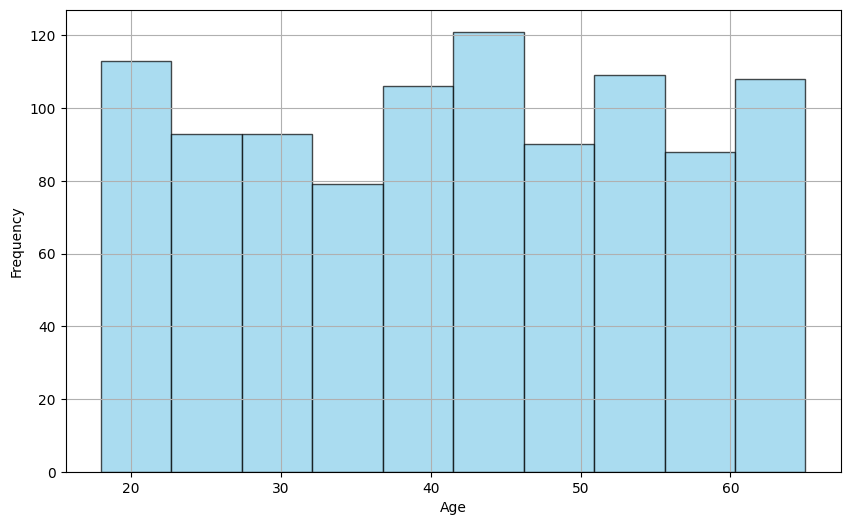

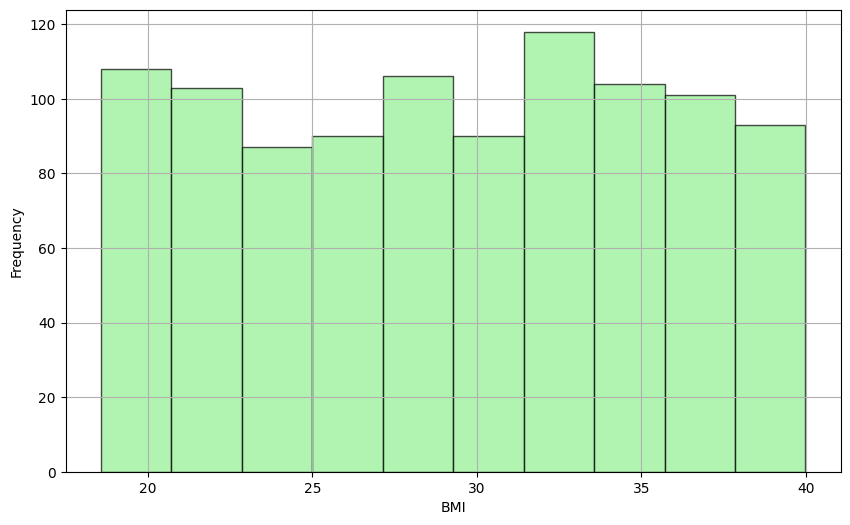

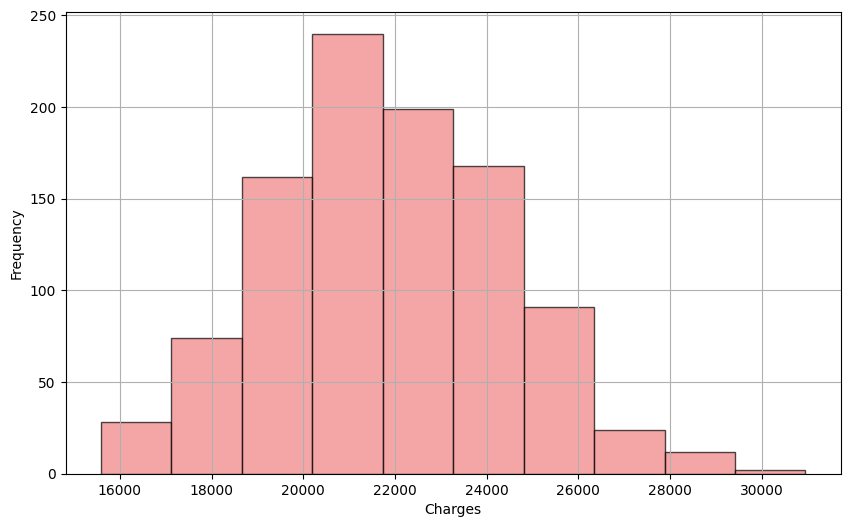

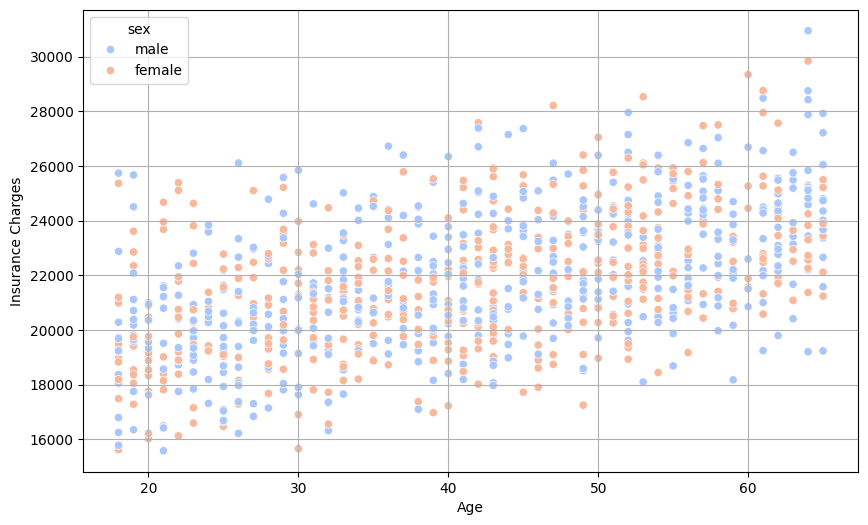

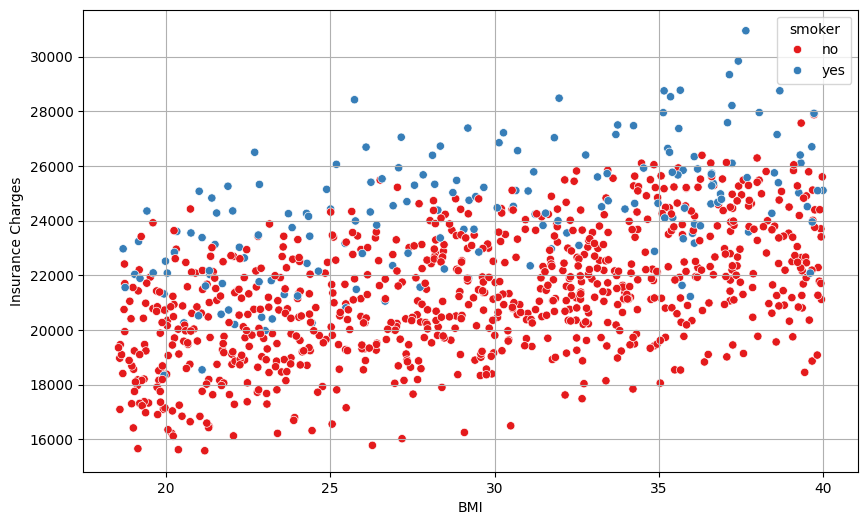

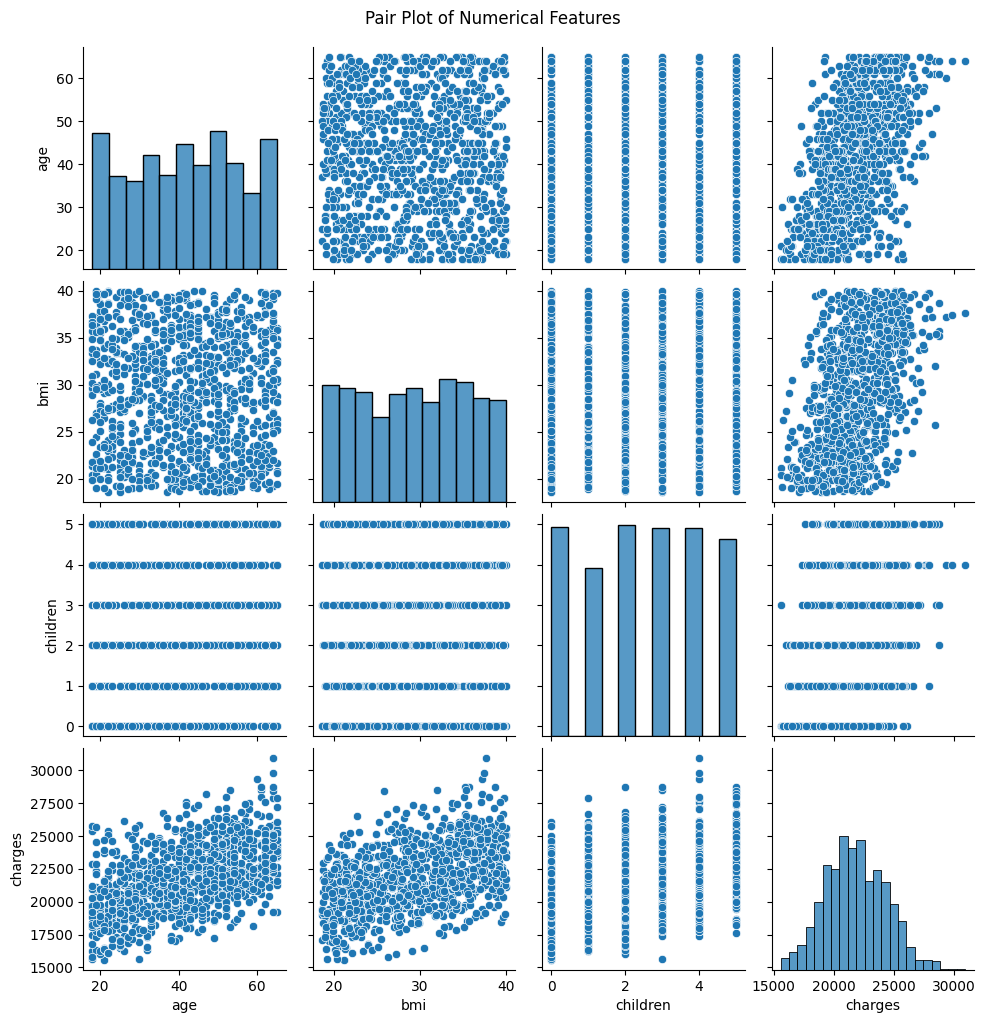

In [93]:
plt.figure(figsize=(10, 6))
insurance_data['age'].hist(bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.title=('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
insurance_data['bmi'].hist(bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title = ('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
insurance_data['charges'].hist(bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title=('Histogram of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: Visualize using Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance_data, hue='sex', palette='coolwarm')
plt.title=('Scatter Plot of Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_data, hue='smoker', palette='Set1')
plt.title=('Scatter Plot of BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.grid(True)
plt.show()

# Step 5: Visualize using Pair Plot (for numerical variables)
sns.pairplot(insurance_data[['age', 'bmi', 'children', 'charges']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

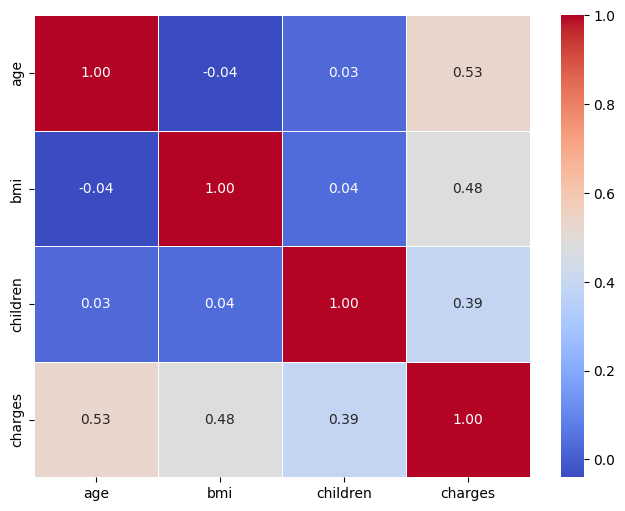

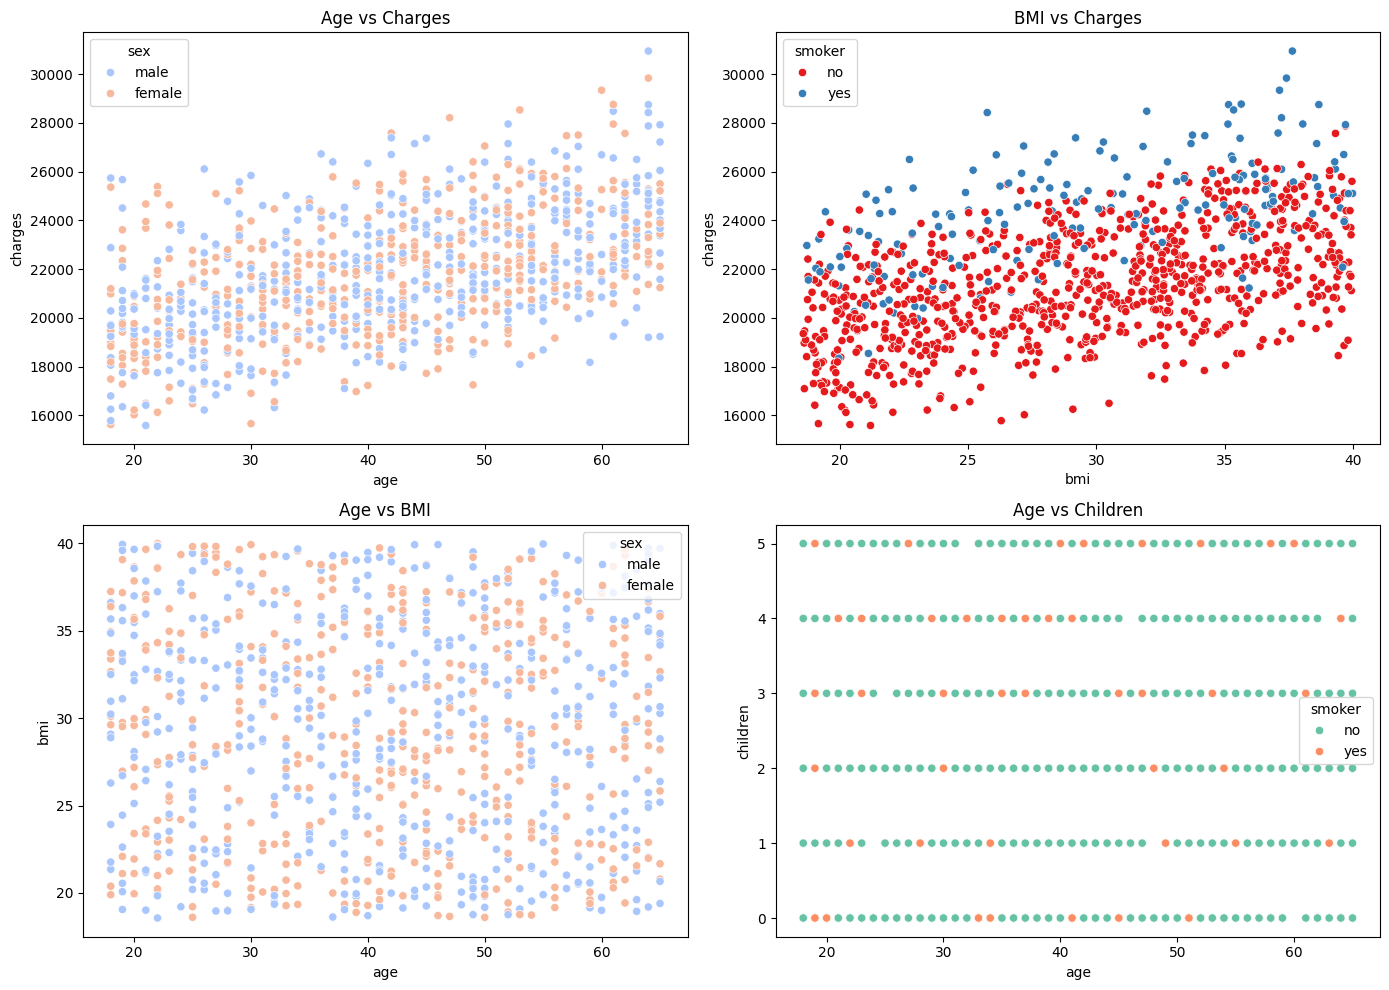

In [94]:
corr_matrix =  insurance_data[['age', 'bmi', 'children', 'charges']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title = 'Correlation Heatmap of Numerical Features'
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: Age vs Charges
sns.scatterplot(x='age', y='charges', data=insurance_data, hue='sex', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Charges')

# Scatter plot: BMI vs Charges
sns.scatterplot(x='bmi', y='charges', data=insurance_data, hue='smoker', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Charges')

# Scatter plot: Age vs BMI
sns.scatterplot(x='age', y='bmi', data=insurance_data, hue='sex', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Age vs BMI')

# Scatter plot: Age vs Children
sns.scatterplot(x='age', y='children', data=insurance_data, hue='smoker', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Age vs Children')

# Adjust layout and show
plt.tight_layout()
plt.show()

* From the visualizations, we can conclude that age is the most influential factor in determining insurance charges, with older individuals generally having higher premiums. BMI shows a moderate relationship with charges, but the correlation is not as strong as with age. The presence of outliers in insurance charges suggests that factors like smoking or region might also play significant roles in determining charges, though their impact is less clear from the basic visualizations. This insight will guide the feature selection process and help refine our predictive model to provide accurate predictions for future insurance charges.

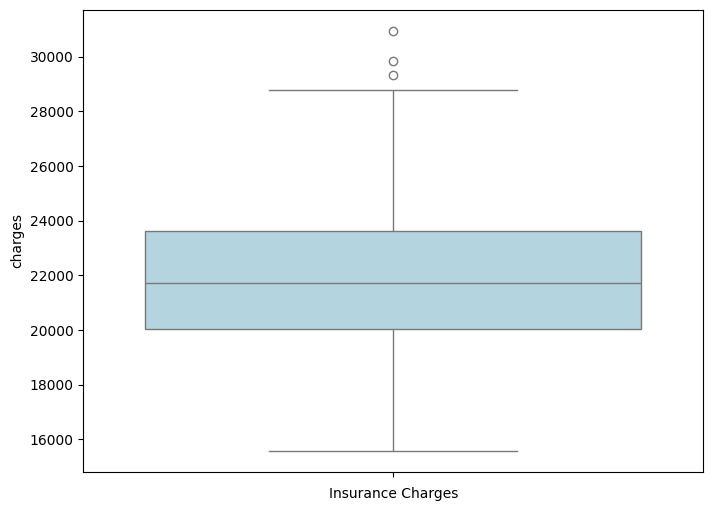

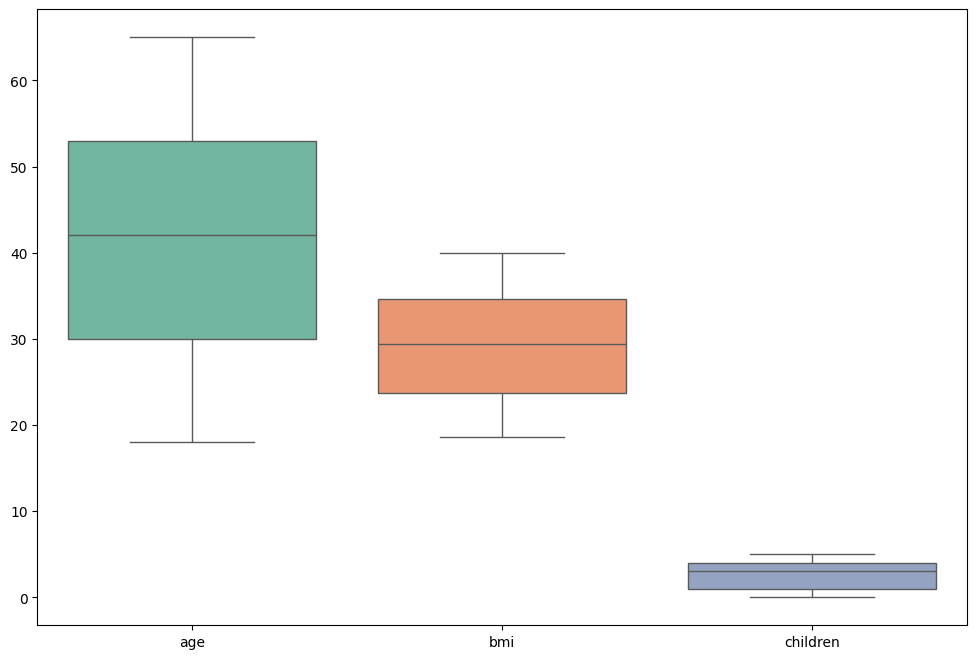

In [95]:

plt.figure(figsize=(8, 6))
sns.boxplot(insurance_data['charges'], color='lightblue')
plt.title=('Box Plot for Insurance Charges (Outliers Identification)')
plt.xlabel('Insurance Charges')
plt.show()
plt.figure(figsize=(12, 8))
sns.boxplot(data=insurance_data[['age', 'bmi', 'children']], palette='Set2')
plt.title = ('Box Plot for Age, BMI, and Number of Children (Outliers Identification)')
plt.show()

# Changing the categorical columns to numerical  

In [96]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,56,male,25.936486,2,no,northwest,21146.899466
1,46,female,31.849684,2,no,northwest,21152.641266
2,32,male,19.483454,2,no,southeast,17331.468379
3,60,female,37.238041,2,no,southwest,24453.892791
4,25,male,39.430013,1,no,northwest,18451.826182


In [97]:
insurance_data["sex"].unique()

array(['male', 'female'], dtype=object)

* we aregoing to change the female and male to 0 and 1 using

In [98]:
insurance_data['sex'] = insurance_data['sex'].map({'female':0, 'male':1})
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,56,1,25.936486,2,no,northwest,21146.899466
1,46,0,31.849684,2,no,northwest,21152.641266
2,32,1,19.483454,2,no,southeast,17331.468379
3,60,0,37.238041,2,no,southwest,24453.892791
4,25,1,39.430013,1,no,northwest,18451.826182


In [99]:
insurance_data['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [100]:
insurance_data['smoker'] = insurance_data['smoker'].map({'no':0,'yes':1})
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,56,1,25.936486,2,0,northwest,21146.899466
1,46,0,31.849684,2,0,northwest,21152.641266
2,32,1,19.483454,2,0,southeast,17331.468379
3,60,0,37.238041,2,0,southwest,24453.892791
4,25,1,39.430013,1,0,northwest,18451.826182


In [101]:
insurance_data['region'].unique()

array(['northwest', 'southeast', 'southwest', 'northeast'], dtype=object)

In [102]:
insurance_data['region'] = insurance_data[ 'region'].map({'northwest':0, 'southeast':1, 'southwest':2, 'northeast':3})
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,56,1,25.936486,2,0,0,21146.899466
1,46,0,31.849684,2,0,0,21152.641266
2,32,1,19.483454,2,0,1,17331.468379
3,60,0,37.238041,2,0,2,24453.892791
4,25,1,39.430013,1,0,0,18451.826182


In [103]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
# Assuming 'df' is your DataFrame with the features you want to scale
scaled_data = scaler.fit_transform(insurance_data)

# Convert the scaled data back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_data, columns=insurance_data.columns)
scaled_df.head()


,age,sex,bmi,children,smoker,region,charges
0,1.048420,0.953099,-0.538741,-0.306933,-0.463753,-1.318691,-0.266808
1,0.321613,-1.049209,0.412730,-0.306933,-0.463753,-1.318691,-0.264557
2,-0.695919,0.953099,-1.577073,-0.306933,-0.463753,-0.408621,-1.762278
3,1.339144,-1.049209,1.279750,-0.306933,-0.463753,0.501448,1.029379
4,-1.204684,0.953099,1.632452,-0.893802,-0.463753,-1.318691,-1.323150


# Train/Testspli

In [104]:
scaled_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [105]:
X = scaled_df.drop(['charges'],axis =1)
y= scaled_df['charges']
X

,age,sex,bmi,children,smoker,region
0,1.048420,0.953099,-0.538741,-0.306933,-0.463753,-1.318691
1,0.321613,-1.049209,0.412730,-0.306933,-0.463753,-1.318691
2,-0.695919,0.953099,-1.577073,-0.306933,-0.463753,-0.408621
3,1.339144,-1.049209,1.279750,-0.306933,-0.463753,0.501448
4,-1.204684,0.953099,1.632452,-0.893802,-0.463753,-1.318691
...,...,...,...,...,...,...
995,-1.350046,-1.049209,0.914871,0.866806,2.156320,-0.408621
996,0.103570,-1.049209,0.992303,1.453675,-0.463753,-0.408621
997,-1.495407,0.953099,0.565187,-0.306933,-0.463753,-1.318691
998,-0.405195,-1.049209,-0.834859,-0.306933,-0.463753,-0.408621


In [106]:
y

,charges
0,-0.266808
1,-0.264557
2,-1.762278
3,1.029379
4,-1.323150
...,...
995,1.101271
996,0.763139
997,-0.403149
998,-1.216112


# Train/Test/split

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape


(800, 6)

In [109]:
X_test.shape

(200, 6)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
#Training
lr = LinearRegression()
reg_model = lr.fit(X_train,y_train)
svm = SVR()
svm_model= svm.fit(X_train,y_train)
Rf = RandomForestRegressor()
Rf_model = Rf.fit(X_train,y_train)
Gb = GradientBoostingRegressor()
Gb_model = Gb.fit(X_train,y_train)


print(reg_model)
print(svm_model)
print(Rf_model)
print(Gb_model)

LinearRegression()
SVR()
RandomForestRegressor()
GradientBoostingRegressor()


In [112]:
lr = LinearRegression()
reg_model = lr.fit(X_train, y_train)

svm = SVR()
svm_model = svm.fit(X_train, y_train)

Rf = RandomForestRegressor()
Rf_model = Rf.fit(X_train, y_train)

Gb = GradientBoostingRegressor()
Gb_model = Gb.fit(X_train, y_train)

# Make predictions with each model
y_pred_lr = reg_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = Rf_model.predict(X_test)
y_pred_gb = Gb_model.predict(X_test)

# Calculate and print accuracy metrics for each model
models = {
    "Linear Regression": y_pred_lr,
    "Support Vector Machine": y_pred_svm,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

for model_name, y_pred in models.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"\nModel: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")


Model: Linear Regression
Mean Absolute Error (MAE): 0.30
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.37
R² Score: 0.87

Model: Support Vector Machine
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.38
R² Score: 0.86

Model: Random Forest
Mean Absolute Error (MAE): 0.34
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
R² Score: 0.82

Model: Gradient Boosting
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R² Score: 0.85


In [113]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('regressor', reg_model),       # Assuming reg_model is your regression model
    ('rf', Rf_model),              # Assuming Rf_model is your Random Forest model
    ('gb', Gb_model),              # Assuming Gb_model is your Gradient Boosting model
]

# Meta-model (final model)
meta_model = LinearRegression()

# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions with the stacking model
y_pred_stacked = stacking_model.predict(X_test)

# Evaluate the stacking model
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

# Print results
print(f"Stacked Model - MAE: {mae_stacked:.2f}, MSE: {mse_stacked:.2f}, R²: {r2_stacked:.2f}")


Stacked Model - MAE: 0.30, MSE: 0.14, R²: 0.87


In [114]:

pip install joblib

In [115]:
!pip install -U scikit-learn joblib


In [116]:
import joblib

In [117]:
import joblib

# Assuming 'reg_model' is your trained regression model
joblib.dump( stacking_model, 'reg_model.joblib')


['reg_model.joblib']

In [118]:
model = joblib.load("reg_model.joblib")
model

StackingRegressor(estimators=[('regressor', LinearRegression()),
                              ('rf', RandomForestRegressor()),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [119]:
import os

# Check if the model file exists
if os.path.exists('reg_model.joblib'):
    print("Model file exists")
else:
    print("Model file does not exist")


Model file exists


In [120]:
from google.colab import files

# Download the model to your local machine
files.download('reg_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# prediction

In [121]:
data = {"age":40,
        "sex":1,
        "bmi":40.30,
        "children":1,
        "smoker":1,
        "region":2
        }
df = pd.DataFrame(data,index = [0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,1,1,2


In [122]:
model.predict(df)

array([38.18565233])